# Linear Regression

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from pathlib import Path

In [2]:
# Images directory

figsdir = Path.cwd() / 'ex1figs'
figsdir.mkdir(parents=True, exist_ok=True);

In [3]:
# Data directory

datadir = Path.cwd() / 'data/ex1'

In [4]:
# Load the data

data = pd.read_csv(datadir / 'ex1data1.txt', names=['population', 'profit'])

x = np.c_[np.ones(data.shape[0]), data.population]
y = np.c_[data.profit]

data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Data visualization

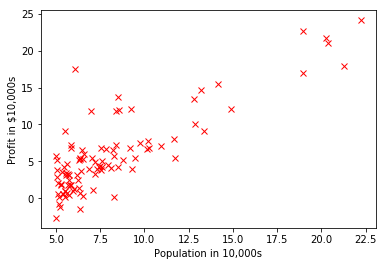

In [5]:
# Plot the data

plt.plot(x[:, 1], y, 'rx')

plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')

plt.savefig(figsdir / 'data.png', bbox_inches='tight')

## Cost and gradient descent

In [6]:
def compute_cost(x, y, theta):
    return np.sum(np.square(x.dot(theta.T) - y)) / (2 * len(x))

In [7]:
# Batch gradient descent implementation

def gradient_descent(x, y, theta, alpha, iterations):
    J_history = np.zeros(iterations)
    for i in range(iterations):
        theta -= (alpha / len(x)) * (x.T.dot(x.dot(theta.T) - y)).T
        J_history[i] = compute_cost(x, y, theta)
    
    return (theta.ravel(), J_history)

Theta found by gradient descent: [-3.63029144  1.16636235]


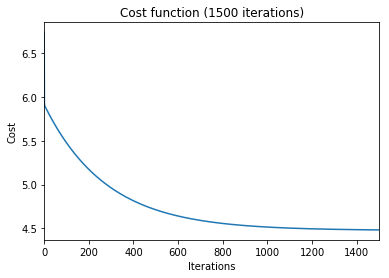

In [8]:
theta = np.zeros((1, 2))

iterations = 1500
alpha = 0.01 # Learning rate

theta, J_history = gradient_descent(x, y, theta, alpha, iterations)

plt.plot(J_history)

plt.title('Cost function ({} iterations)'.format(iterations))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xlim(0, iterations)

plt.savefig(figsdir / 'cost_function.png', bbox_inches='tight')

print('Theta found by gradient descent: {}'.format(theta))

## Linear fit visualization

For a population of 35,000 we predict a profit of $4519.77
For a population of 70,000 we predict a profit of $45342.45


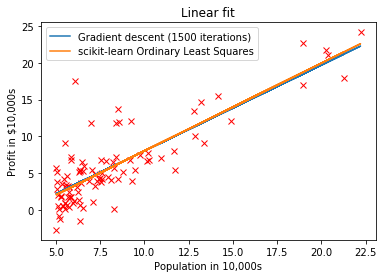

In [9]:
# Scikit-learn GLM

regr = LinearRegression()
regr.fit(x[:, 1].reshape(-1, 1), y)

plt.plot(x[:, 1], y, 'rx')
plt.plot(x[:, 1], x.dot(theta.T), label='Gradient descent ({} iterations)'.format(iterations))
plt.plot(x[:, 1], (regr.intercept_ + regr.coef_ * x[:, 1]).T, label='scikit-learn Ordinary Least Squares')

plt.title('Linear fit')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='best')

plt.savefig(figsdir / 'linear_fit.png', bbox_inches='tight')

predict_one = np.array([1, 3.5]).dot(theta.T) * 10000
predict_two = np.array([1, 7]).dot(theta.T) * 10000
print('For a population of 35,000 we predict a profit of ${:.2f}'.format(predict_one))
print('For a population of 70,000 we predict a profit of ${:.2f}'.format(predict_two))

## Cost function surface and contour plots

In [10]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

theta0, theta1 = np.meshgrid(theta0, theta1)

J_vals = np.zeros((len(theta0), len(theta1)))

for (i, j),_ in np.ndenumerate(J_vals):
        J_vals[i,j] = compute_cost(x, y, np.matrix([theta0[i, j], theta1[i, j]]))

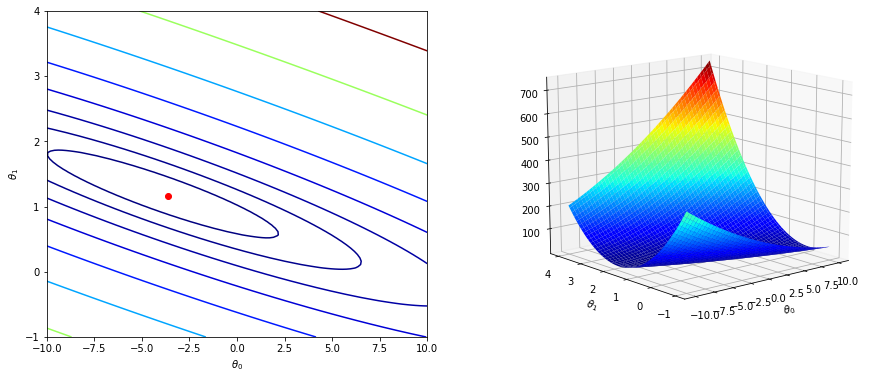

In [11]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

ax1.contour(theta0, theta1, J_vals, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0], theta[1], c='r')

ax2.plot_surface(theta0, theta1, J_vals, cmap=plt.cm.jet)
ax2.set_zlim(J_vals.min(),J_vals.max())
ax2.view_init(elev=15, azim=230)

for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    
plt.savefig(figsdir / '3d_countour.png', bbox_inches='tight')

In [12]:
def rotate(angle):
    ax2.view_init(azim=angle)

In [13]:
# Rotate by 360° and save animation

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
rot_animation.save(figsdir / 'rotation.gif', dpi=80, writer='imagemagick')

# Multivariate linear regression

In [14]:
data = pd.read_csv(datadir / 'ex1data2.txt', names=['size', 'bedrooms', 'price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [15]:
x = np.c_[data.loc[:, 'size':'bedrooms']].astype(float)
y = np.c_[data['price']].astype(float)

In [16]:
def feature_normalize(x):
    mu = x.mean(axis=0)
    sigma = x.std(axis=0, ddof=1)
    x_norm = np.divide(x - mu, sigma)
    
    return x_norm, mu, sigma

In [17]:
# Feature normalization

x_norm, mu, sigma = feature_normalize(x)

Theta found by gradient descent: [334302.06399328 100087.11600585   3673.54845093]


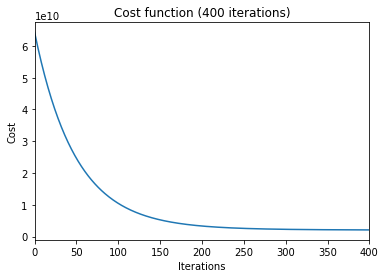

In [18]:
alpha = 0.01 # Learning rate
iterations = 400

x = np.c_[np.ones(data.shape[0]), x_norm]

theta = np.zeros((1, 3))
theta, J_history = gradient_descent(x, y, theta, alpha, iterations)

plt.plot(J_history)

plt.title('Cost function ({} iterations)'.format(iterations))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xlim(0, iterations)

plt.savefig(figsdir / 'cost_function_multi.png', bbox_inches='tight')

print('Theta found by gradient descent: {}'.format(theta))

In [19]:
mu = np.r_[0, mu]
sigma = np.r_[1, sigma]
predicted_price = ((np.array([1, 1650, 3]) - mu) / sigma).dot(theta.T)

print('Predicted price for a 1650 square feet house with 3 bedrooms: ${:.2f}'.format(predicted_price))

Predicted price for a 1650 square feet house with 3 bedrooms: $289314.62


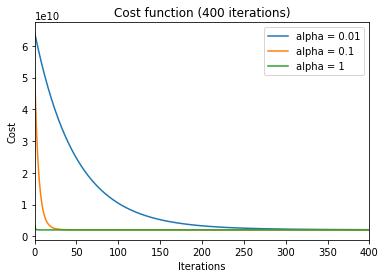

In [20]:
_, J1 = gradient_descent(x, y, np.zeros((1, 3)), 0.01, iterations)
_, J2 = gradient_descent(x, y, np.zeros((1, 3)), 0.1, iterations)
_, J3 = gradient_descent(x, y, np.zeros((1, 3)), 1, iterations)

plt.plot(J1)
plt.plot(J2)
plt.plot(J3)

plt.title('Cost function ({} iterations)'.format(iterations))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(['alpha = 0.01', 'alpha = 0.1', 'alpha = 1'])
plt.xlim(0, iterations)

plt.savefig(figsdir / 'learning_rates_multi.png', bbox_inches='tight')

In [21]:
x = np.c_[np.ones(data.shape[0]), data.loc[:, 'size':'bedrooms']]
y = np.c_[data['price']]

theta = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y)).ravel()

predicted_price = np.array([1, 1650, 3]).dot(theta.T)
print('Predicted price (with normal equation) for a 1650 square feet house with 3 bedrooms: ${:.2f}'.format(predicted_price))

Predicted price (with normal equation) for a 1650 square feet house with 3 bedrooms: $293081.46
